<a href="https://colab.research.google.com/github/BardRimon/Study/blob/main/Introduction_in_NLP/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_6_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%9A%D0%BB%D1%8E%D0%BA%D0%B8%D0%BD.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 6. Извлечение именованных сущностей


1. Маскировать все адреса и имена в электронном письме.
2. Собрать из набора описаний IT-вакансий топ-5 требуемых навыков (скиллов) для Java-разработчика.
3. Улучшить качество базовой предсказательной CRF-модели на тестовой выборке за счет добавления и модификации признаков.
4. Улучшить качество базовой предсказательной LSTM-CRF-модели на тестовой выборке за счет подбора предобученных эмбеддингов.

[презентация](https://docs.google.com/presentation/d/1BQCx8LK4m9f9kHN78vym-tj7Zz_NxL7c/edit?slide=id.p1#slide=id.p1)

## задача 1: маркировка имён в email

In [ ]:
! pip -q install natasha

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 52.1 MB/s eta 0:00:00


In [ ]:
from natasha import Segmenter, NewsEmbedding, NewsNERTagger, Doc


email = """ Уважаемые коллеги, добрый вечер! К завтрашнему собранию собрала все баллы в одну таблицу (добавила в предыдущий документ новый лист), посмотрите, пожалуйста, всех ли добавила?

Вопросы к завтрашнему собранию:
1. Допускаем ли мы до презентации решений в финале всех, или кого-то придется отсеять?
2. Время проведения финала.
3. Окончательный список экспертов для финала.
4. Критерии оценивания для финала.

----------------
Кому: Оксана Ивановна Александрова (alexandrova_oi@pfur.ru), Полина Юрьевна Повалко (povalko_pyu@pfur.ru), Валерия Владимировна Иванова (ivanova_vv@pfur.ru), Анна Дмитриевна Левшиц (levshits_ad@pfur.ru), Марина Игоревна Волк (volk_mi@pfur.ru), Валентин Викторович Матвиенко (matvienko_vv@pfur.ru), Елена Юрьевна Бурдовская (burdovskaya_eyu@pfur.ru), Гульчира Талгатовна Гарипова (garipova_gt@pfur.ru), Ольга Сергеевна Кочеткова (kochetkova_os@pfur.ru), Кристина Петровна Жикулина (zhikulina_kp@pfur.ru), Юлия Матвеевна Алюнина (aliunina_yum@pfur.ru), Мария Анатольевна Бородина (borodina_mra@pfur.ru), Светлана Анатольевна Петрова (petrova_sa@pfur.ru), Надежда Евгеньевна Железняк (zheleznyak_ne@pfur.ru), Тинатин Владимировна Чхиквадзе (chkhikvadze_tv@pfur.ru), Полина Александровна Бычкова (bychkova_pa@pfur.ru), Павел Михайлович Подолько (podolko_pm@pfur.ru), Ярослава Сергеевна Барышева (barysheva_yas@pfur.ru), Александр Викторович Клюкин (kliukin_av@pfur.ru), Лали Владиславовна Чебуханова (chebukhanova_lv@pfur.ru);
Тема: 15.05: Обсуждение результатов кейс-чемпионата;"""

print(email)

segmenter = Segmenter()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

doc = Doc(email)
doc.segment(segmenter)

doc.tag_ner(ner_tagger)
doc.ner.print()

 Уважаемые коллеги, добрый вечер! К завтрашнему собранию собрала все баллы в одну таблицу (добавила в предыдущий документ новый лист), посмотрите, пожалуйста, всех ли добавила?
 
Вопросы к завтрашнему собранию:
1. Допускаем ли мы до презентации решений в финале всех, или кого-то придется отсеять?
2. Время проведения финала.
3. Окончательный список экспертов для финала.
4. Критерии оценивания для финала.
 
----------------
Кому: Оксана Ивановна Александрова (alexandrova_oi@pfur.ru), Полина Юрьевна Повалко (povalko_pyu@pfur.ru), Валерия Владимировна Иванова (ivanova_vv@pfur.ru), Анна Дмитриевна Левшиц (levshits_ad@pfur.ru), Марина Игоревна Волк (volk_mi@pfur.ru), Валентин Викторович Матвиенко (matvienko_vv@pfur.ru), Елена Юрьевна Бурдовская (burdovskaya_eyu@pfur.ru), Гульчира Талгатовна Гарипова (garipova_gt@pfur.ru), Ольга Сергеевна Кочеткова (kochetkova_os@pfur.ru), Кристина Петровна Жикулина (zhikulina_kp@pfur.ru), Юлия Матвеевна Алюнина (aliunina_yum@pfur.ru), Мария Анатольевна Бород

In [ ]:
replacements = []
for span in doc.spans:
  if span.type == 'PER':
    replacements.append((span.start, span.stop, '[ИМЯ]'))


masked_email = email
for start, stop, replacement_text in sorted(replacements, key=lambda x: x[0], reverse=True):
  masked_email = masked_email[:start] + replacement_text + masked_email[stop:]

print(masked_email)

 Уважаемые коллеги, добрый вечер! К завтрашнему собранию собрала все баллы в одну таблицу (добавила в предыдущий документ новый лист), посмотрите, пожалуйста, всех ли добавила?
 
Вопросы к завтрашнему собранию:
1. Допускаем ли мы до презентации решений в финале всех, или кого-то придется отсеять?
2. Время проведения финала.
3. Окончательный список экспертов для финала.
4. Критерии оценивания для финала.
 
----------------
Кому: [ИМЯ] (alexandrova_oi@pfur.ru), [ИМЯ] (povalko_pyu@pfur.ru), [ИМЯ] (ivanova_vv@pfur.ru), [ИМЯ] (levshits_ad@pfur.ru), [ИМЯ] (volk_mi@pfur.ru), [ИМЯ] (matvienko_vv@pfur.ru), [ИМЯ] (burdovskaya_eyu@pfur.ru), [ИМЯ] (garipova_gt@pfur.ru), [ИМЯ] (kochetkova_os@pfur.ru), [ИМЯ] (zhikulina_kp@pfur.ru), [ИМЯ] (aliunina_yum@pfur.ru), [ИМЯ] (borodina_mra@pfur.ru), [ИМЯ] (petrova_sa@pfur.ru), [ИМЯ] (zheleznyak_ne@pfur.ru), [ИМЯ] (chkhikvadze_tv@pfur.ru), [ИМЯ] (bychkova_pa@pfur.ru), [ИМЯ] (podolko_pm@pfur.ru), [ИМЯ] (barysheva_yas@pfur.ru), [ИМЯ] (kliukin_av@pfur.ru), [ИМЯ]

## Поиск top 5 skills для java-разработчика CRF

In [ ]:
! wget https://www.dropbox.com/s/resrekpsxk3yd4d/vacancies.csv

--2025-06-02 13:08:05--  https://www.dropbox.com/s/resrekpsxk3yd4d/vacancies.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/arvkzclltciuf39v5w8ke/vacancies.csv?rlkey=cmdn4394g12a5vdjwjpuimmbw [following]
--2025-06-02 13:08:05--  https://www.dropbox.com/scl/fi/arvkzclltciuf39v5w8ke/vacancies.csv?rlkey=cmdn4394g12a5vdjwjpuimmbw
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3708949e88a29763c9d8690d42.dl.dropboxusercontent.com/cd/0/inline/Cq17Bt0tALEPjbZyE9198BUTOo-tWhxDeoCA2ut9wg-YXZTzng-tSGxLkVjSimo6bg8guEQkWMyNV40yPBg-_73-JoUTMo9t_fhkyBy5Ff-eUd-659FV9aOFp07ZYkYYxLc-ylSpDkt9EuhcPUaeYH_T/file# [following]
--2025-06-02 13:08:06--  https://uc3708949e88a29763c9d8690d42.dl.dropboxusercontent.com/cd/0/inlin

In [ ]:
import pandas as pd
df = pd.read_csv('vacancies.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1215 non-null   int64 
 1   name              1215 non-null   object
 2   city              1215 non-null   object
 3   employer          1215 non-null   object
 4   publication_date  1215 non-null   object
 5   description       1215 non-null   object
dtypes: int64(1), object(5)
memory usage: 57.1+ KB


In [ ]:
df[['name', 'description']].head()



,name,description
0,Инженер удаленной технической поддержки рабочи...,<p><strong>Обязанности:</strong></p> <p>• Обра...
1,Frontend разработчик,<p><strong>Требования: </strong></p><p>Опыт we...
2,JavaScript разработчик,<p><strong>Требования: </strong></p><p>Опыт we...
3,Ведущий инженер,<p>Сбербанк объявляет конкурс на позицию <stro...
4,Главный инженер по сопровождению,<p><strong>Обязанности:</strong></p><p>· Админ...


In [ ]:
java_df = df[(df['name'].str.contains('Java', case=False)) & (~df['name'].str.contains('Javascript', case=False))]
java_df['name'].head()

,name
10,Главный инженер по Java разработке
14,Руководитель разработки_java
21,Senior java-разработчик
23,Lead Java Developer в ДомКлик
24,Senior Java Developer в ДомКлик


In [ ]:
java_df['description'].iloc[1]

'<p><strong>Общие требования:</strong></p><ul><li>Опыт коммерческой разработки в финансовой сфере от 5 лет, отличное понимание особенности разработки, внедрения и поддержки финансового ПО</li><li>Опыт управления командой разработки от 3 человек с использованием систем контроля версий, средств автоматизации сборки, управления требованиями и конфигурациями</li><li>Опыт интеграции разработанного ПО с другими системами</li><li>Понятие о принципах разработки ПО, ООП, паттернах проектирования</li><li>Умение работать по гибким методологиям (Scrum, kanban)</li></ul><p> </p><p><strong>Необходимые навыки и технологии:</strong></p><ul><li>Глубокое понимание Сore java 1.7+</li><li>Опыт разработки WEB-приложений на Java. Знание стека j2ee: jms, ejb, jax-ws, mbean, jndi</li><li>опыт работы с соответствующими серверами</li></ul><p>знания xml, sql, hibernate, quartz</p><ul><li>Умение проводить code-review</li></ul><p> </p><p><strong>Будет плюсом:</strong></p><ul><li>Опыт коммерческой разработки ПО под

In [ ]:
import pandas as pd
import re
from collections import Counter

def extract_english_words(df):

    all_words = []
    english_word_pattern = re.compile(r'[a-zA-Z]+')

    for description in df.dropna():
            if isinstance(description, str):
                found_words = english_word_pattern.findall(description)
                all_words.extend([word.lower() for word in found_words])

    words = Counter(all_words)
    return words

def clean_text(text):

    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

clean_java_df = java_df['description'].apply(clean_text)
words = extract_english_words(clean_java_df)

tegs = words.most_common(5)
print(tegs)



[('java', 199), ('spring', 95), ('git', 64), ('agile', 56), ('sql', 52)]


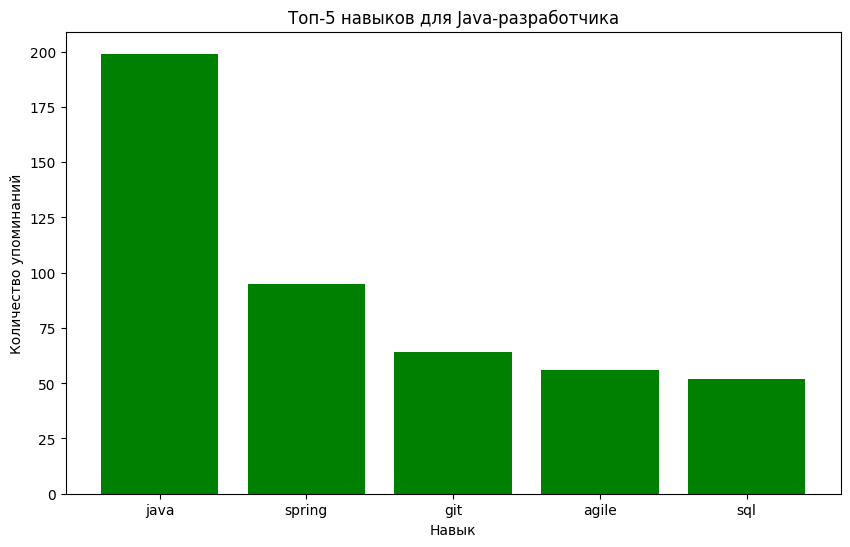

In [ ]:
import matplotlib.pyplot as plt


words, counts = zip(*tegs) # крутая приколюха
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='green')
plt.xlabel('Навык')
plt.ylabel('Количество упоминаний')
plt.title('Топ-5 навыков для Java-разработчика')
plt.show()


## Пункт 3 CRF нейросеть с помощью

In [ ]:
! wget https://www.dropbox.com/s/iuwsx5pmfhkk0w2/ner_dataset.csv

--2025-06-03 09:33:11--  https://www.dropbox.com/s/iuwsx5pmfhkk0w2/ner_dataset.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/cu61u8g7z5thol0npjj7f/ner_dataset.csv?rlkey=rb70mhtw6yu4r4bu49qoxbjj4 [following]
--2025-06-03 09:33:12--  https://www.dropbox.com/scl/fi/cu61u8g7z5thol0npjj7f/ner_dataset.csv?rlkey=rb70mhtw6yu4r4bu49qoxbjj4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb56da8aed736afebf6c1b69723.dl.dropboxusercontent.com/cd/0/inline/Cq6t28JICvnKgsPdDzOYeMIfpgeu1u_MZvlcRLxXpZE-TcsTlvAIxqCVaOpiU9bGB4dBUj48XOEDoXDNf9GCwb7vww2wD0IMCtMlct-SVeqoUYyU0cnJJy60KKnh0t4jfLXMkfp6Bl7Jx-GTuoP_4jun/file# [following]
--2025-06-03 09:33:13--  https://ucb56da8aed736afebf6c1b69723.dl.dropboxusercontent.com/cd

In [ ]:
import pandas as pd

data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data = data.fillna(method="ffill")

agg_func = lambda s: [[w, p, t] for w, p, t in zip(s["Word"].values.tolist(),
                                                   s["POS"].values.tolist(),
                                                   s["Tag"].values.tolist())]
grouped = data.groupby("Sentence #").apply(agg_func).values.tolist()

X_list = [[word[:2] for word in sentence] for sentence in grouped]
y_list = [[word[2] for word in sentence] for sentence in grouped]

<ipython-input-10-1b9e290aec29>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")
<ipython-input-10-1b9e290aec29>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = data.groupby("Sentence #").apply(agg_func).values.tolist()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  1048575 non-null  object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [ ]:
print(data['Tag'].unique())

['O' 'B-geo' 'B-gpe' 'B-per' 'I-geo' 'B-org' 'I-org' 'B-tim' 'B-art'
 'I-art' 'I-per' 'I-gpe' 'I-tim' 'B-nat' 'B-eve' 'I-eve' 'I-nat']


Тег | Описание
----|----------
O | Outside - Токен не является частью именованной сущности.
B-geo | Beginning of a Geopolitical Entity - Начало географической сущности (страна, город, область и т.д.).
B-gpe | Beginning of a Geopolitical Entity - Начало геополитической сущности (национальность, религиозные группы и т.д.).
B-per | Beginning of a Person - Начало имени человека.
I-geo | Inside of a Geopolitical Entity - Часть географической сущности.
B-org | Beginning of an Organization - Начало названия организации.
I-org | Inside of an Organization - Часть названия организации.
B-tim | Beginning of a Time expression - Начало временного выражения.
B-art | Beginning of an Art object - Начало названия произведения искусства.
I-art | Inside of an Art object - Часть названия произведения искусства.
I-per | Inside of a Person - Часть имени человека.
I-gpe | Inside of a Geopolitical Entity - Часть геополитической сущности.
I-tim | Inside of a Time expression - Часть временного выражения.
B-nat | Beginning of a Natural phenomenon - Начало названия природного явления.
B-eve | Beginning of an Event - Начало названия события.
I-eve | Inside of an Event - Часть названия события.
I-nat | Inside of a Natural phenomenon - Часть названия природного явления.

In [ ]:
data.count_

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)

In [ ]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'word.lower()': word.lower(),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        ### Your code goes here ###
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            ### Your code goes here ###
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            ### Your code goes here ###
        })
    else:
        features['EOS'] = True

    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

X_train = [sent2features(s) for s in data_train]
X_test = [sent2features(s) for s in data_test]

### сначала без улучшений, базовые функции

In [ ]:
!pip install -q sklearn-crfsuite

In [ ]:
import sklearn_crfsuite

crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=10,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    max_iterations=10)

In [ ]:
from sklearn_crfsuite import metrics

y_pred = crf.predict(X_test)

print(metrics.flat_f1_score(y_test, y_pred, average='weighted'))
metrics_crf = metrics.flat_classification_report(y_test, y_pred)
print(metrics_crf)


0.883630359373572


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        94
       B-eve       0.00      0.00      0.00        70
       B-geo       0.49      0.91      0.64      7558
       B-gpe       0.97      0.17      0.29      3142
       B-nat       0.00      0.00      0.00        40
       B-org       0.55      0.33      0.41      4151
       B-per       1.00      0.10      0.18      3400
       B-tim       0.93      0.12      0.21      4077
       I-art       0.00      0.00      0.00        84
       I-eve       0.00      0.00      0.00        65
       I-geo       0.27      0.65      0.38      1462
       I-gpe       0.00      0.00      0.00        33
       I-nat       0.00      0.00      0.00        13
       I-org       0.37      0.58      0.45      3394
       I-per       0.94      0.09      0.17      3406
       I-tim       0.00      0.00      0.00      1251
           O       0.97      0.99      0.98    177590

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### улучшаем функции, добавляем фичи

In [ ]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'word.lower()': word.lower(),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        ### Your code goes here ###
        'word.length()': len(word), # Добавленный признак: длина слова
        'word.startswith_cap()': word[0].isupper(), # Добавленный признак: начинается с заглавной буквы
        'bias': 1.0,
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            ### Your code goes here ###
            '-1:word.length()': len(word1), # Добавленный признак: длина предыдущего слова
            '-1:word.endswith_s()': word1.lower().endswith('s'),

        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            ### Your code goes here ###
            '+1:word.length()': len(word1), # Добавленный признак: длина следующего слова
            '+1:word.startswith_cap()': word1[0].isupper() if len(word1) > 0 else False,
        })
    else:
        features['EOS'] = True

    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]


X_train = [sent2features(s) for s in data_train]
X_test = [sent2features(s) for s in data_test]


In [ ]:
crf_improved = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=15,
    all_possible_transitions=True
)
crf_improved.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    max_iterations=15)

In [ ]:
y_pred = crf_improved.predict(X_test)
print(metrics.flat_f1_score(y_test, y_pred, average='weighted'))
metrics_crf_imporved = metrics.flat_classification_report(y_test, y_pred)
print(metrics_crf_imporved)

0.9324898417362706


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        94
       B-eve       0.00      0.00      0.00        70
       B-geo       0.69      0.82      0.75      7558
       B-gpe       0.78      0.78      0.78      3142
       B-nat       0.00      0.00      0.00        40
       B-org       0.64      0.46      0.53      4151
       B-per       0.68      0.65      0.66      3400
       B-tim       0.87      0.52      0.65      4077
       I-art       0.00      0.00      0.00        84
       I-eve       0.00      0.00      0.00        65
       I-geo       0.69      0.38      0.49      1462
       I-gpe       0.00      0.00      0.00        33
       I-nat       0.00      0.00      0.00        13
       I-org       0.55      0.60      0.57      3394
       I-per       0.66      0.81      0.73      3406
       I-tim       0.73      0.41      0.52      1251
           O       0.98      0.99      0.98    177590

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Пункт 4, улуч

In [ ]:
! pip install pytorch-crf fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313504 sha256=442a0ee8e3b82d9e7b0eda085e59a258b027132a99ac35ed7006ee3363b13273
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:

import torch
import torch.nn as nn
from torchcrf import CRF
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import fasttext
import fasttext.util


MAX_LEN = 50
EMBEDDING_DIM = 300
HIDDEN_DIM = 256
BATCH_SIZE = 32
EPOCHS = 7
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


data = pd.read_csv("ner_dataset.csv", encoding="latin1").ffill()

sentences = []
sentence = []
for _, row in data.iterrows():
    if row['Sentence #'] != sentence[-1][0] if sentence else None:
        if sentence:
            sentences.append([x[1:] for x in sentence])
        sentence = [(row['Sentence #'], row['Word'], row['Tag'])]
    else:
        sentence.append((row['Sentence #'], row['Word'], row['Tag']))
if sentence:
    sentences.append([x[1:] for x in sentence])

words = list(set(data["Word"].values))
tags = list(set(data["Tag"].values))

word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["<PAD>"] = 0
word2idx["<UNK>"] = 1

tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {i: t for t, i in tag2idx.items()}




rare_labels = {'B-art', 'I-art', 'B-eve', 'I-eve', 'B-nat', 'I-nat'}
augmented = [s for s in sentences if any(t in rare_labels for _, t in s)]
sentences.extend(augmented * 10)


fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')

embedding_matrix = np.random.uniform(-0.25, 0.25, (len(word2idx), EMBEDDING_DIM))
for word, idx in word2idx.items():
    if word in ft:
        embedding_matrix[idx] = ft.get_word_vector(word)
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

# === Подготовка данных ===
def encode_sentence(sentence, word2idx, tag2idx, max_len=MAX_LEN):
    words = [word2idx.get(w[0], 1) for w in sentence]
    tags = [tag2idx[w[1]] for w in sentence]
    words = words[:max_len] + [0]*(max_len - len(words))
    tags = tags[:max_len] + [tag2idx["O"]] * (max_len - len(tags))
    return words, tags

X, y = zip(*[encode_sentence(s, word2idx, tag2idx) for s in sentences])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NERDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(NERDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(NERDataset(X_test, y_test), batch_size=BATCH_SIZE)


class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, tagset_size, embedding_dim, hidden_dim, embeddings=None):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        if embeddings is not None:
            self.embedding.weight.data.copy_(embeddings)
            self.embedding.weight.requires_grad = True
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2, num_layers=1,
                            bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.crf = CRF(tagset_size, batch_first=True)

    def forward(self, x, mask):
        embeds = self.embedding(x)
        lstm_out, _ = self.lstm(embeds)
        lstm_out = self.dropout(lstm_out)
        emissions = self.hidden2tag(lstm_out)
        return emissions

    def loss(self, x, tags, mask):
        emissions = self.forward(x, mask)
        return -self.crf(emissions, tags, mask=mask)

    def predict(self, x, mask):
        emissions = self.forward(x, mask)
        return self.crf.decode(emissions, mask=mask)





In [ ]:
model = BiLSTM_CRF(len(word2idx), len(tag2idx), EMBEDDING_DIM, HIDDEN_DIM, embedding_matrix).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch_x, batch_y in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        loss = model.loss(batch_x, batch_y, mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f}")

Epoch 1: 100%|██████████| 1399/1399 [01:20<00:00, 17.37it/s]


[Epoch 1] Loss: 203201.9873


Epoch 2: 100%|██████████| 1399/1399 [01:20<00:00, 17.34it/s]


[Epoch 2] Loss: 65097.6222


Epoch 3: 100%|██████████| 1399/1399 [01:19<00:00, 17.64it/s]


[Epoch 3] Loss: 44925.3195


Epoch 4: 100%|██████████| 1399/1399 [01:19<00:00, 17.53it/s]


[Epoch 4] Loss: 34334.7812


Epoch 5: 100%|██████████| 1399/1399 [01:19<00:00, 17.67it/s]


[Epoch 5] Loss: 27515.4282


Epoch 6: 100%|██████████| 1399/1399 [01:19<00:00, 17.68it/s]


[Epoch 6] Loss: 22076.5365


Epoch 7: 100%|██████████| 1399/1399 [01:18<00:00, 17.71it/s]

[Epoch 7] Loss: 18154.8034


In [ ]:
# === Оценка ===
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        preds = model.predict(batch_x, mask)
        for p_seq, t_seq, m in zip(preds, batch_y.tolist(), mask.tolist()):
            valid_len = sum(m)
            all_preds.extend([idx2tag[i] for i in p_seq[:valid_len]])
            all_labels.extend([idx2tag[i] for i in t_seq[:valid_len]])

from sklearn.metrics import classification_report
metric_lstm = classification_report(all_labels, all_preds, digits=3)
print(metric_lstm)



              precision    recall  f1-score   support

       B-art      0.943     0.998     0.969       875
       B-eve      0.960     1.000     0.980       676
       B-geo      0.874     0.904     0.888      8765
       B-gpe      0.961     0.939     0.950      3631
       B-nat      0.964     0.996     0.980       463
       B-org      0.805     0.765     0.784      4698
       B-per      0.873     0.861     0.867      3963
       B-tim      0.914     0.907     0.911      4812
       I-art      0.960     1.000     0.980       674
       I-eve      0.970     1.000     0.985       551
       I-geo      0.838     0.814     0.826      1755
       I-gpe      0.757     0.683     0.718        41
       I-nat      0.977     1.000     0.988       126
       I-org      0.828     0.814     0.821      3996
       I-per      0.886     0.892     0.889      3962
       I-tim      0.869     0.788     0.826      1715
           O      0.992     0.993     0.993    207553

    accuracy              

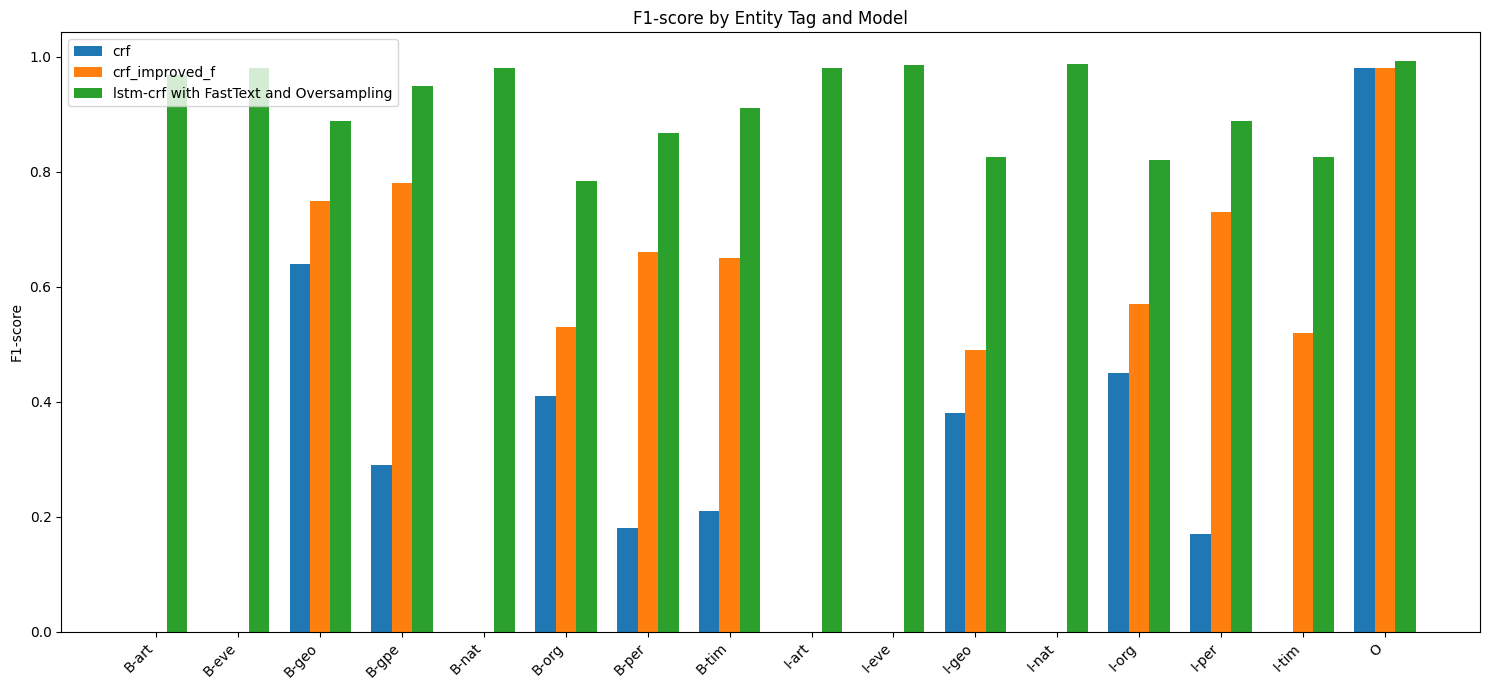

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def parse_classification_report(report):
    lines = report.split('\n')
    metrics_dict = {}
    for line in lines[2:-5]:  # Skip header and footer lines
        if line.strip():
            parts = line.split()
            if len(parts) >= 5:
                label = parts[0]
                precision = float(parts[1])
                recall = float(parts[2])
                f1_score = float(parts[3])
                support = int(parts[4])
                metrics_dict[label] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': support}
    return metrics_dict

metrics_crf_dict = parse_classification_report(metrics_crf)
metrics_crf_improved_dict = parse_classification_report(metrics_crf_imporved)
metrics_lstm_dict = parse_classification_report(metric_lstm)

labels = sorted(list(set(list(metrics_crf_dict.keys()) + list(metrics_crf_improved_dict.keys()) + list(metrics_lstm_dict.keys()))))

# Filter out labels with very low support that might skew the plot
labels_to_plot = [label for label in labels if metrics_crf_dict.get(label, {}).get('support', 0) > 50 or metrics_crf_improved_dict.get(label, {}).get('support', 0) > 50 or metrics_lstm_dict.get(label, {}).get('support', 0) > 50]

f1_crf = [metrics_crf_dict.get(label, {}).get('f1-score', 0) for label in labels_to_plot]
f1_crf_improved = [metrics_crf_improved_dict.get(label, {}).get('f1-score', 0) for label in labels_to_plot]
f1_lstm = [metrics_lstm_dict.get(label, {}).get('f1-score', 0) for label in labels_to_plot]


x = np.arange(len(labels_to_plot))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width, f1_crf, width, label='crf')
rects2 = ax.bar(x, f1_crf_improved, width, label='crf_improved_f')
rects3 = ax.bar(x + width, f1_lstm, width, label='lstm-crf with FastText and Oversampling')

ax.set_ylabel('F1-score')
ax.set_title('F1-score by Entity Tag and Model')
ax.set_xticks(x)
ax.set_xticklabels(labels_to_plot, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()